In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [3]:
print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape)
train_df.head()

Train shape:  (891, 12)
Test shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#data exploration / analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The train dataset has 891 entries and 12 features. 5

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#checking for missing values
train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [7]:
#checking for % of missing values
percent_missing = round(train_df.isnull().sum()  / train_df.isnull().count() * 100).sort_values(ascending = False)
print(percent_missing)

Cabin          77.0
Age            20.0
Embarked        0.0
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64


In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

UNIVARIATE ANALYSIS

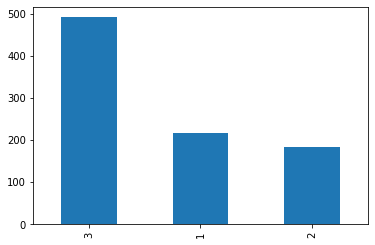

In [9]:
train_df['Pclass'].value_counts().plot(kind='bar')

from the graph above of the socio-economic status , third class has the highest amount of survival rate, then the first class with the middle class having the lowest.

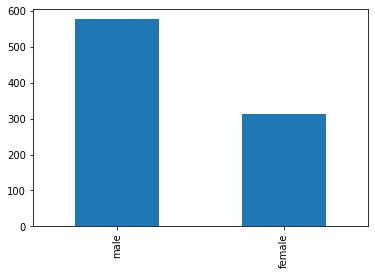

In [10]:
train_df['Sex'].value_counts().plot(kind='bar')

it can be concluded that the male sex had more survival rate from the dataset

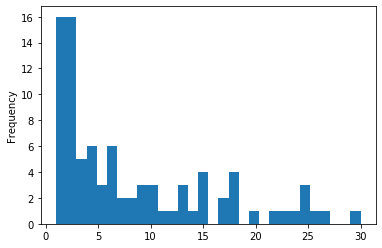

In [11]:
train_df['Age'].value_counts().plot(kind='hist',bins=30)

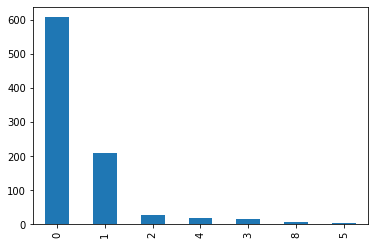

In [12]:
train_df['SibSp'].value_counts().plot(kind='bar')

the rate of survival of the sibling-spouse is higher at 0. Means those with none

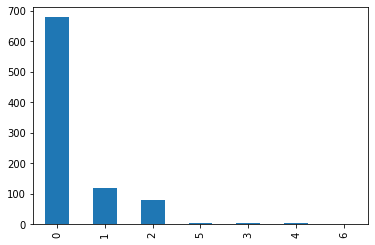

In [13]:
train_df['Parch'].value_counts().plot(kind='bar')

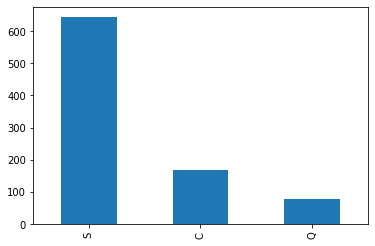

In [14]:
train_df['Embarked'].value_counts().plot(kind='bar')

there's a relatively high survival rate from people who embarked at S port

BIVARIATE ANALYSIS

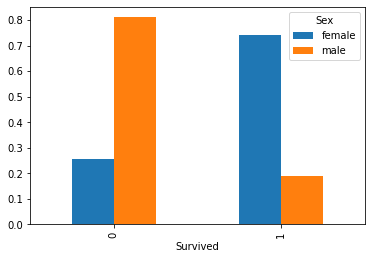

In [15]:
gender = pd.crosstab(train_df['Survived'],train_df["Sex"])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

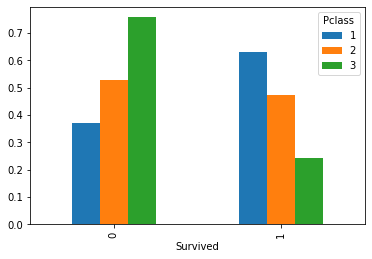

In [16]:
socio_class = pd.crosstab(train_df['Survived'],train_df['Pclass'])
socio_class
socio_class.div(socio_class.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)

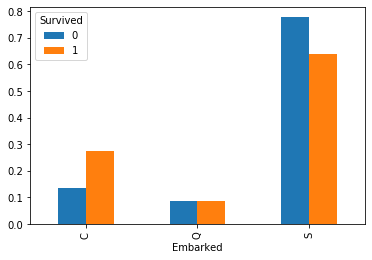

In [17]:
embarked_location = pd.crosstab(train_df['Embarked'], train_df['Survived'])
embarked_location.div(embarked_location.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

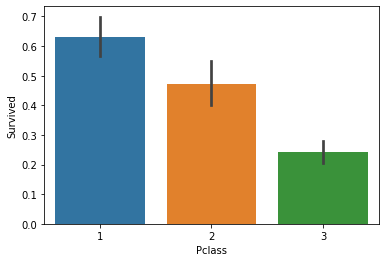

In [18]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [26]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [27]:
train_df['Age'].isna().sum()

0

In [31]:
train_df = train_df[train_df['Embarked'].notnull()]
train_df['Embarked'].isna().sum()

0

In [33]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
train_df.drop(columns=cols_to_drop, inplace = True, axis=1)
test_df.drop(columns=cols_to_drop, inplace = True, axis=1)
print(train_df.shape)

(889, 7)


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


Coverting Features

In [38]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
print(test_df['Sex'].head(2))
test_df['Sex'] = lb.fit_transform(test_df['Sex'])
print(test_df['Sex'].head(2))


print(train_df['Sex'].head(2))
train_df['Sex'] = lb.fit_transform(train_df['Sex'])
print(train_df['Sex'].head(2))

0    1
1    0
Name: Sex, dtype: int64
0    1
1    0
Name: Sex, dtype: int64
0    1
1    0
Name: Sex, dtype: int32
0    1
1    0
Name: Sex, dtype: int64


In [39]:
label_binarizer = preprocessing.LabelBinarizer()
test_df['Embarked'] = label_binarizer.fit_transform(test_df['Embarked'])
print(test_df['Embarked'].head(2))

train_df['Embarked'] = label_binarizer.fit_transform(train_df['Embarked'])
print(train_df['Embarked'].head(2))

0    0
1    0
Name: Embarked, dtype: int32
0    0
1    1
Name: Embarked, dtype: int32


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null int32
dtypes: float64(1), int32(1), int64(5)
memory usage: 52.1 KB


Model Building

In [54]:
X_train = train_df.drop(columns=['Survived'], axis=1)
Y_train = train_df['Survived']
X_test = train_df.drop('Parch',axis=1).copy()

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred =decision_tree.predict(X_test)
acc_decision_tree =round(decision_tree.score(X_train, Y_train)* 100, 2)

In [61]:
print("The Accuracy for the Model is: {}%".format(acc_decision_tree))

The Accuracy for the Model is: 92.58%
